In [20]:
import pandas as pd

df2003 = pd.read_csv("dataFrames/INMET_CO_DF_A001_BRASILIA_01-01-2003_A_31-12-2003.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2013 = pd.read_csv("dataFrames/INMET_CO_DF_A001_BRASILIA_01-01-2013_A_31-12-2013.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
df2023 = pd.read_csv("dataFrames/INMET_CO_DF_A001_BRASILIA_01-01-2023_A_31-12-2023.CSV", encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)

Ajustando os data frames

In [2]:
hora23 = df2023["Hora UTC"].values
hora23 = [h.split(" ")[0][:2] + ":" + h.split(" ")[0][2:] for h in hora23]
df2023["Hora UTC"] = hora23
df2023.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2023/01/01,00:00,0.0,887.7,887.7,887.2,NaN,20.1,17.9,20.9,20.0,19.2,17.8,91.0,87.0,87.0,187.0,3.3,1.2,NaN
1,2023/01/01,01:00,0.0,888.1,888.1,887.7,NaN,19.2,17.5,20.1,19.2,17.8,17.4,90.0,87.0,90.0,153.0,2.9,0.8,NaN
2,2023/01/01,02:00,0.0,887.8,888.1,887.8,NaN,19.3,17.6,19.5,19.0,17.8,17.3,90.0,89.0,90.0,145.0,2.5,1.5,NaN
3,2023/01/01,03:00,0.0,887.8,887.9,887.7,NaN,19.3,17.7,19.4,19.1,17.8,17.5,91.0,90.0,91.0,162.0,3.2,1.4,NaN
4,2023/01/01,04:00,0.0,887.6,887.9,887.6,NaN,19.7,18.1,19.7,19.1,18.1,17.4,91.0,90.0,90.0,140.0,5.7,2.7,NaN


In [3]:

df2023.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)

In [4]:
df = pd.concat([df2003, df2013, df2023])


In [5]:
data = df["DATA (YYYY-MM-DD)"].values
index = pd.DatetimeIndex(data, name="Data")
df.drop("DATA (YYYY-MM-DD)", axis=1, inplace=True)
df.set_index(index, inplace=True)


In [6]:
mi = []
for columns in df.columns:
    a = (columns,"")
    if(columns.find("PRESSAO")>-1 or columns.find("PRESSÃO")>-1):
        a = ("Pressão",columns)
    if(columns.find("TEMPERATURA")>-1):
        a = ("Temperatura",columns)
    if(columns.find("UMIDADE")>-1):
        a = ("Umidade",columns)
    if(columns.find("VENTO")>-1):
        a = ("Velocidade do Vento",columns)
    mi.append(a)

In [7]:
df.columns = pd.MultiIndex.from_tuples(mi)
df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                         
Data                                                     
2003-01-01      00:00                              0.0   
2003-01-01      01:00                              0.0   
2003-01-01      02:00                              0.0   
2003-01-01      03:00                              0.0   
2003-01-01      04:00                              0.0   
...               ...                              ...   
2023-12-31      19:00                              0.0   
2023-12-31      20:00                              0.0   
2023-12-31      21:00                              0.0   
2023-12-31      22:00                              0.0   
2023-12-31      23:00                              0.0   

                                                         Pressão  \
           PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
Data                                                               
2003-01-01                                              886.9      
2003-01-01                                              887.3      
2003-01-01                                              887.8      
2003-01-01                                              886.9      
2003-01-01                                              886.8      
...                                                       ...      
2023-12-31                                              884.2      
2023-12-31                                              883.7      
2023-12-31                                              883.5      
2023-12-31                                              884.5      
2023-12-31                                              885.3      

                                                            \
           PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
Data                                                         
2003-01-01                                           887.0   
2003-01-01                                           887.3   
2003-01-01                                           887.8   
2003-01-01                                           887.8   
2003-01-01                                           886.9   
...                                                    ...   
2023-12-31                                           885.2   
2023-12-31                                           884.3   
2023-12-31                                           883.7   
2023-12-31                                           884.5   
2023-12-31                                           885.3   

                                                             \
           PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
Data                                                          
2003-01-01                                            886.5   
2003-01-01                                            886.9   
2003-01-01                                            887.3   
2003-01-01                                            886.9   
2003-01-01                                            886.7   
...                                                     ...   
2023-12-31                                            884.2   
2023-12-31                                            883.7   
2023-12-31                                            883.4   
2023-12-31                                            883.5   
2023-12-31                                            884.5   

           RADIACAO GLOBAL (KJ/m²)  \
                                     
Data                                 
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
2003-01-01                 -9999.0   
...                            ...   
2023-12-31                  1252.2   
2023-12-31                  1178.8   
2023-12-31                   873.0   
2023-12-31                   104.0   

Evolução do acumulado de precipitações nos anos

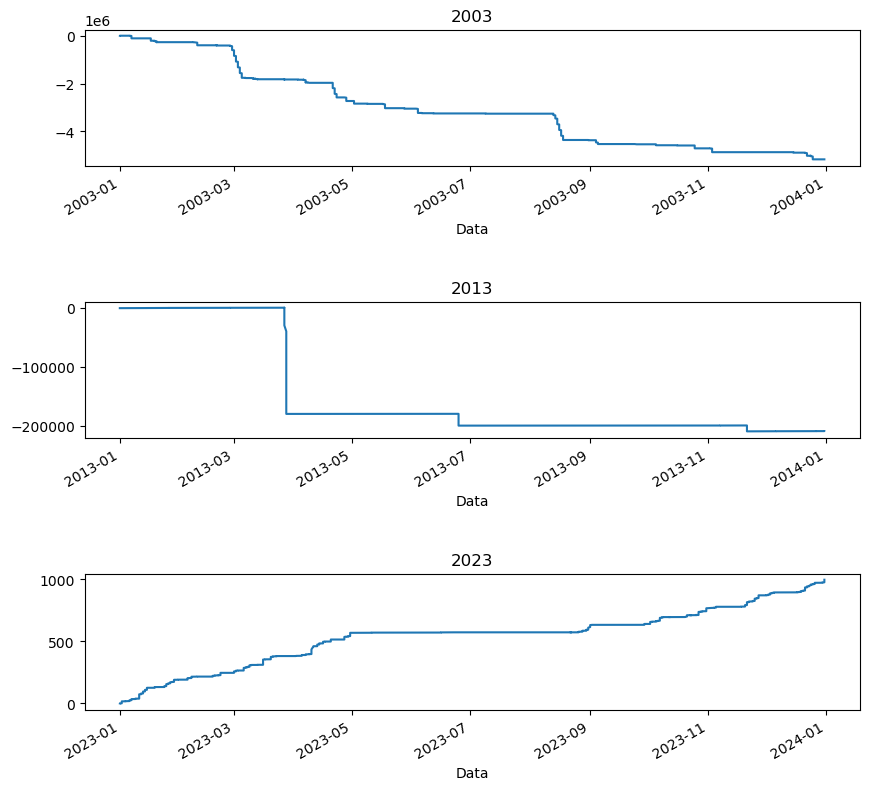

In [8]:

import matplotlib.pyplot as plt
idf = df.groupby([df.index.year])["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for ano, ax in zip(['2003', '2013', '2023'], axes):
    idf.loc[ano].plot(ax=ax, title=ano)
plt.subplots_adjust(wspace=1, hspace=1)



Evolução das temperaturas médias entre os anos

array([<Axes: xlabel='Data,Data'>, <Axes: xlabel='Data,Data'>,
       <Axes: xlabel='Data,Data'>, <Axes: xlabel='Data,Data'>,
       <Axes: xlabel='Data,Data'>, <Axes: xlabel='Data,Data'>],
      dtype=object)

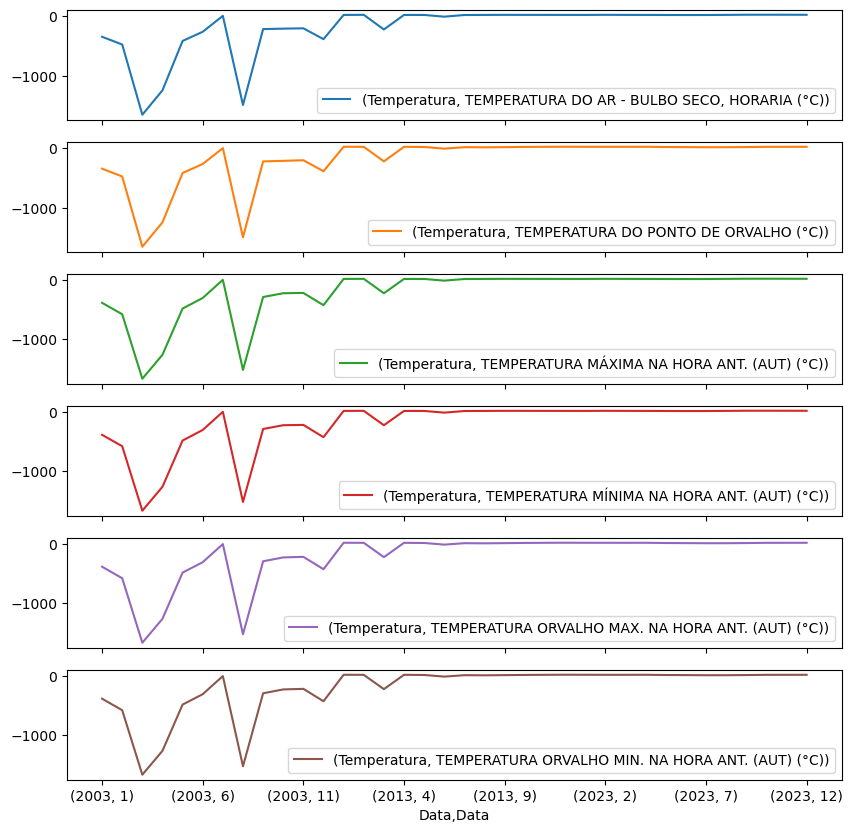

In [9]:
idf = df.groupby([df.index.year, df.index.month])["Temperatura"].mean()
idf.plot(subplots=True, figsize=(10,10))

Acumulado de precipitações no mes de Junho

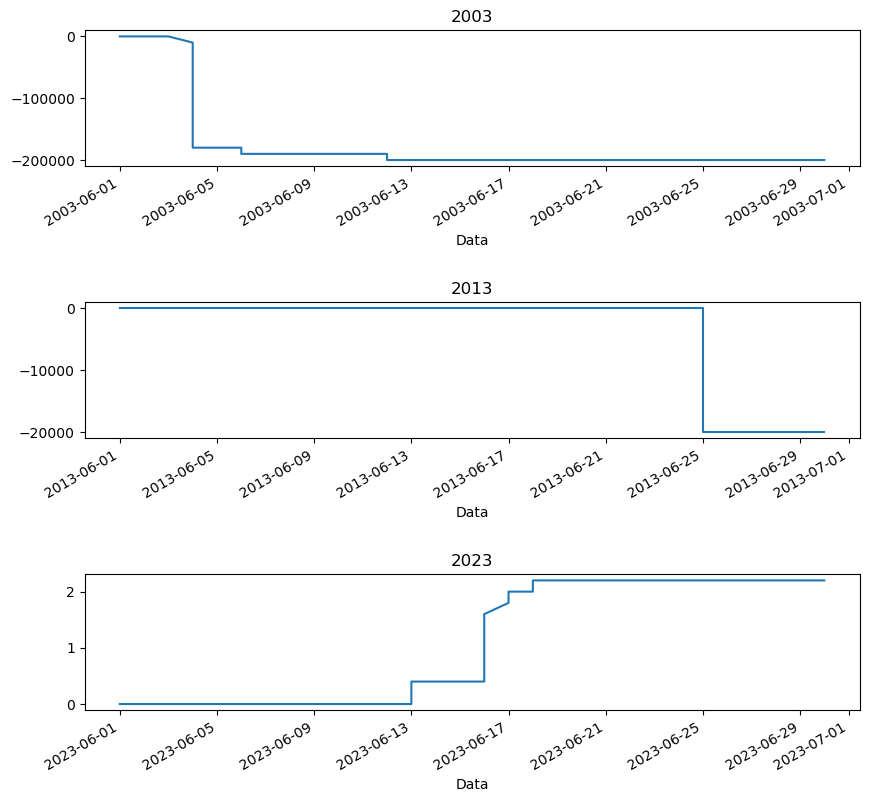

In [10]:
idf = df.loc[df.index.month == 6]
idf = idf.groupby([idf.index.year])["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].cumsum()
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for ano, ax in zip(['2003', '2013', '2023'], axes):
    idf.loc[ano].plot(ax=ax, title=ano)
plt.subplots_adjust(wspace=1, hspace=1)

Médias das temperaturas do mês de Março

array([<Axes: xlabel='Data,Data'>, <Axes: xlabel='Data,Data'>,
       <Axes: xlabel='Data,Data'>, <Axes: xlabel='Data,Data'>,
       <Axes: xlabel='Data,Data'>, <Axes: xlabel='Data,Data'>],
      dtype=object)

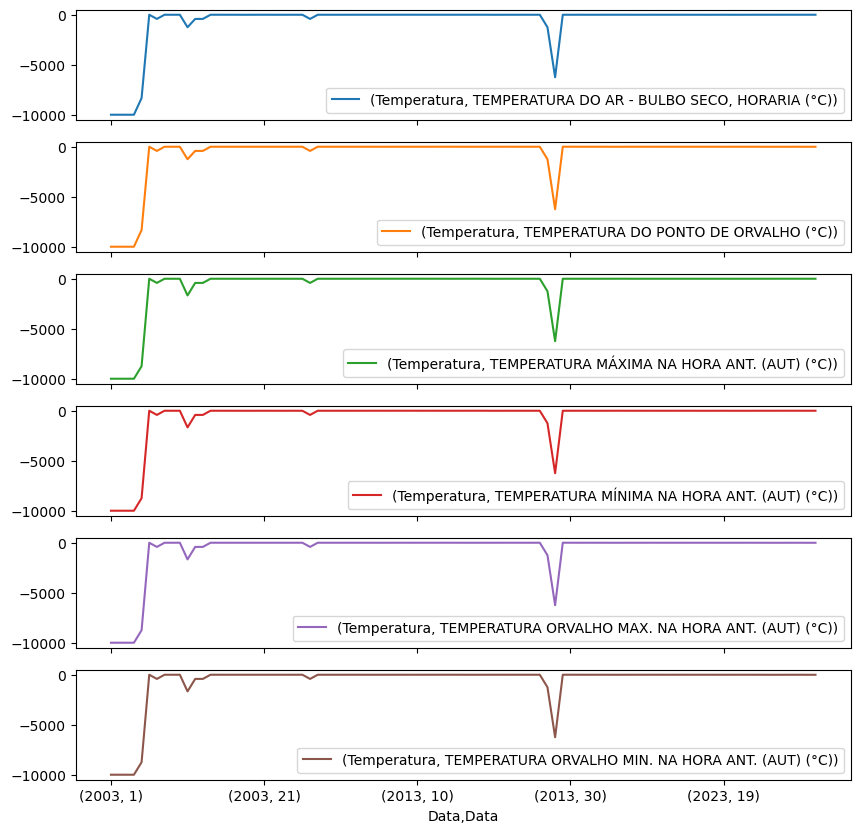

In [11]:
idf = df.loc[df.index.month == 3]
idf = idf.groupby([idf.index.year, idf.index.day])["Temperatura"].mean()
idf.plot(subplots= True, figsize=(10,10))

Determinando as estações do ano

In [12]:
estacao = ["Verâo" if (1 <= x  <= 3) else x for x in df.index.month]
estacao = ["Outono" if type(x) != str and (4 <= x  <= 6) else x for x in estacao]
estacao = ["Inverno" if type(x) != str and (7 <= x  <= 9) else x for x in estacao]
estacao = ["Primavera" if type(x) != str and (10 <= x  <= 12) else x for x in estacao]

In [13]:
tuplas = list(zip(index, estacao))
multiindex = pd.MultiIndex.from_tuples(tuplas, names=['Data', 'Estação'])
df.set_index(multiindex, inplace=True)
df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                                   
Data       Estação                                                 
2003-01-01 Verâo          00:00                              0.0   
           Verâo          01:00                              0.0   
           Verâo          02:00                              0.0   
           Verâo          03:00                              0.0   
           Verâo          04:00                              0.0   
...                         ...                              ...   
2023-12-31 Primavera      19:00                              0.0   
           Primavera      20:00                              0.0   
           Primavera      21:00                              0.0   
           Primavera      22:00                              0.0   
           Primavera      23:00                              0.0   

                                                                   Pressão  \
                     PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
Data       Estação                                                           
2003-01-01 Verâo                                                  886.9      
           Verâo                                                  887.3      
           Verâo                                                  887.8      
           Verâo                                                  886.9      
           Verâo                                                  886.8      
...                                                                 ...      
2023-12-31 Primavera                                              884.2      
           Primavera                                              883.7      
           Primavera                                              883.5      
           Primavera                                              884.5      
           Primavera                                              885.3      

                                                                      \
                     PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
Data       Estação                                                     
2003-01-01 Verâo                                               887.0   
           Verâo                                               887.3   
           Verâo                                               887.8   
           Verâo                                               887.8   
           Verâo                                               886.9   
...                                                              ...   
2023-12-31 Primavera                                           885.2   
           Primavera                                           884.3   
           Primavera                                           883.7   
           Primavera                                           884.5   
           Primavera                                           885.3   

                                                                       \
                     PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
Data       Estação                                                      
2003-01-01 Verâo                                                886.5   
           Verâo                                                886.9   
           Verâo                                                887.3   
           Verâo                                                886.9   
           Verâo                                                886.7   
...                                                               ...   
2023-12-31 Primavera                                            884.2   
           Primavera                                            883.7   
           Primavera                                            883.4   
           Primavera                                            883.5   
           Primav

In [14]:
ano = df.index.get_level_values("Data").year

Precipitações máximas e mínimas de cada estação do ano.

array([<Axes: title={'center': 'min'}, xlabel='Ano, Estação'>,
       <Axes: title={'center': 'max'}, xlabel='Ano, Estação'>],
      dtype=object)

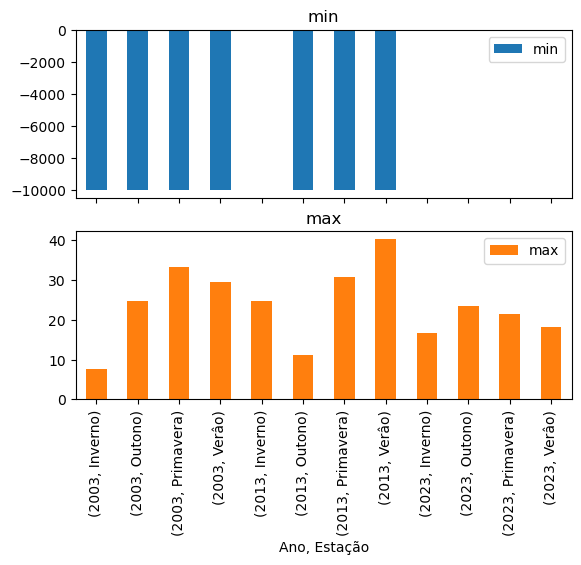

In [15]:
idf = df.groupby([ano, "Estação"])["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].agg(["min", "max"])
idf.plot(subplots=True, kind='bar', xlabel='Ano, Estação')

Determinando os intervalos dos dias

In [16]:
hora = df["HORA (UTC)"].values
hora = [h[:2] for h in hora]

In [17]:

intervalo = ["Madrugada" if (0 <= int(x) < 6) else x for x in hora]
intervalo = ["Manhã" if (x[1]!= 'a') and (6 <= int(x) < 12) else x for x in intervalo]
intervalo = ["Tarde" if (x[1]!= 'a') and (12 <= int(x) < 18) else x for x in intervalo]
intervalo = ["Noite" if (x[1]!= 'a') and (18 <= int(x) < 24) else x for x in intervalo]

In [18]:
tuplas = list(zip(index, estacao, intervalo))
multiindex = pd.MultiIndex.from_tuples(tuplas, names=['Data', 'Estação', 'Intervalo'])
df.set_index(multiindex, inplace=True)
df

HORA (UTC) PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
                                                                             
Data       Estação   Intervalo                                               
2003-01-01 Verâo     Madrugada      00:00                              0.0   
                     Madrugada      01:00                              0.0   
                     Madrugada      02:00                              0.0   
                     Madrugada      03:00                              0.0   
                     Madrugada      04:00                              0.0   
...                                   ...                              ...   
2023-12-31 Primavera Noite          19:00                              0.0   
                     Noite          20:00                              0.0   
                     Noite          21:00                              0.0   
                     Noite          22:00                              0.0   
                     Noite          23:00                              0.0   

                                                                             Pressão  \
                               PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
Data       Estação   Intervalo                                                         
2003-01-01 Verâo     Madrugada                                              886.9      
                     Madrugada                                              887.3      
                     Madrugada                                              887.8      
                     Madrugada                                              886.9      
                     Madrugada                                              886.8      
...                                                                           ...      
2023-12-31 Primavera Noite                                                  884.2      
                     Noite                                                  883.7      
                     Noite                                                  883.5      
                     Noite                                                  884.5      
                     Noite                                                  885.3      

                                                                                \
                               PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
Data       Estação   Intervalo                                                   
2003-01-01 Verâo     Madrugada                                           887.0   
                     Madrugada                                           887.3   
                     Madrugada                                           887.8   
                     Madrugada                                           887.8   
                     Madrugada                                           886.9   
...                                                                        ...   
2023-12-31 Primavera Noite                                               885.2   
                     Noite                                               884.3   
                     Noite                                               883.7   
                     Noite                                               884.5   
                     Noite                                               885.3   

                                                                                 \
                               PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
Data       Estação   Intervalo                                                    
2003-01-01 Verâo     Madrugada                                            886.5   
                     Madrugada                                            886.9   
                     Madrugada                                            887.3   
                     Madrugada                            

Média das temperaturas de cada intervalo do dia 28 de Setembro para cada ano.

array([<Axes: title={'center': '(Temperatura, TEMPERATURA DO AR - BULBO SECO, HORARIA (°C))'}, xlabel='Ano, Intervalo'>,
       <Axes: title={'center': '(Temperatura, TEMPERATURA DO PONTO DE ORVALHO (°C))'}, xlabel='Ano, Intervalo'>,
       <Axes: title={'center': '(Temperatura, TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C))'}, xlabel='Ano, Intervalo'>,
       <Axes: title={'center': '(Temperatura, TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C))'}, xlabel='Ano, Intervalo'>,
       <Axes: title={'center': '(Temperatura, TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C))'}, xlabel='Ano, Intervalo'>,
       <Axes: title={'center': '(Temperatura, TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C))'}, xlabel='Ano, Intervalo'>],
      dtype=object)

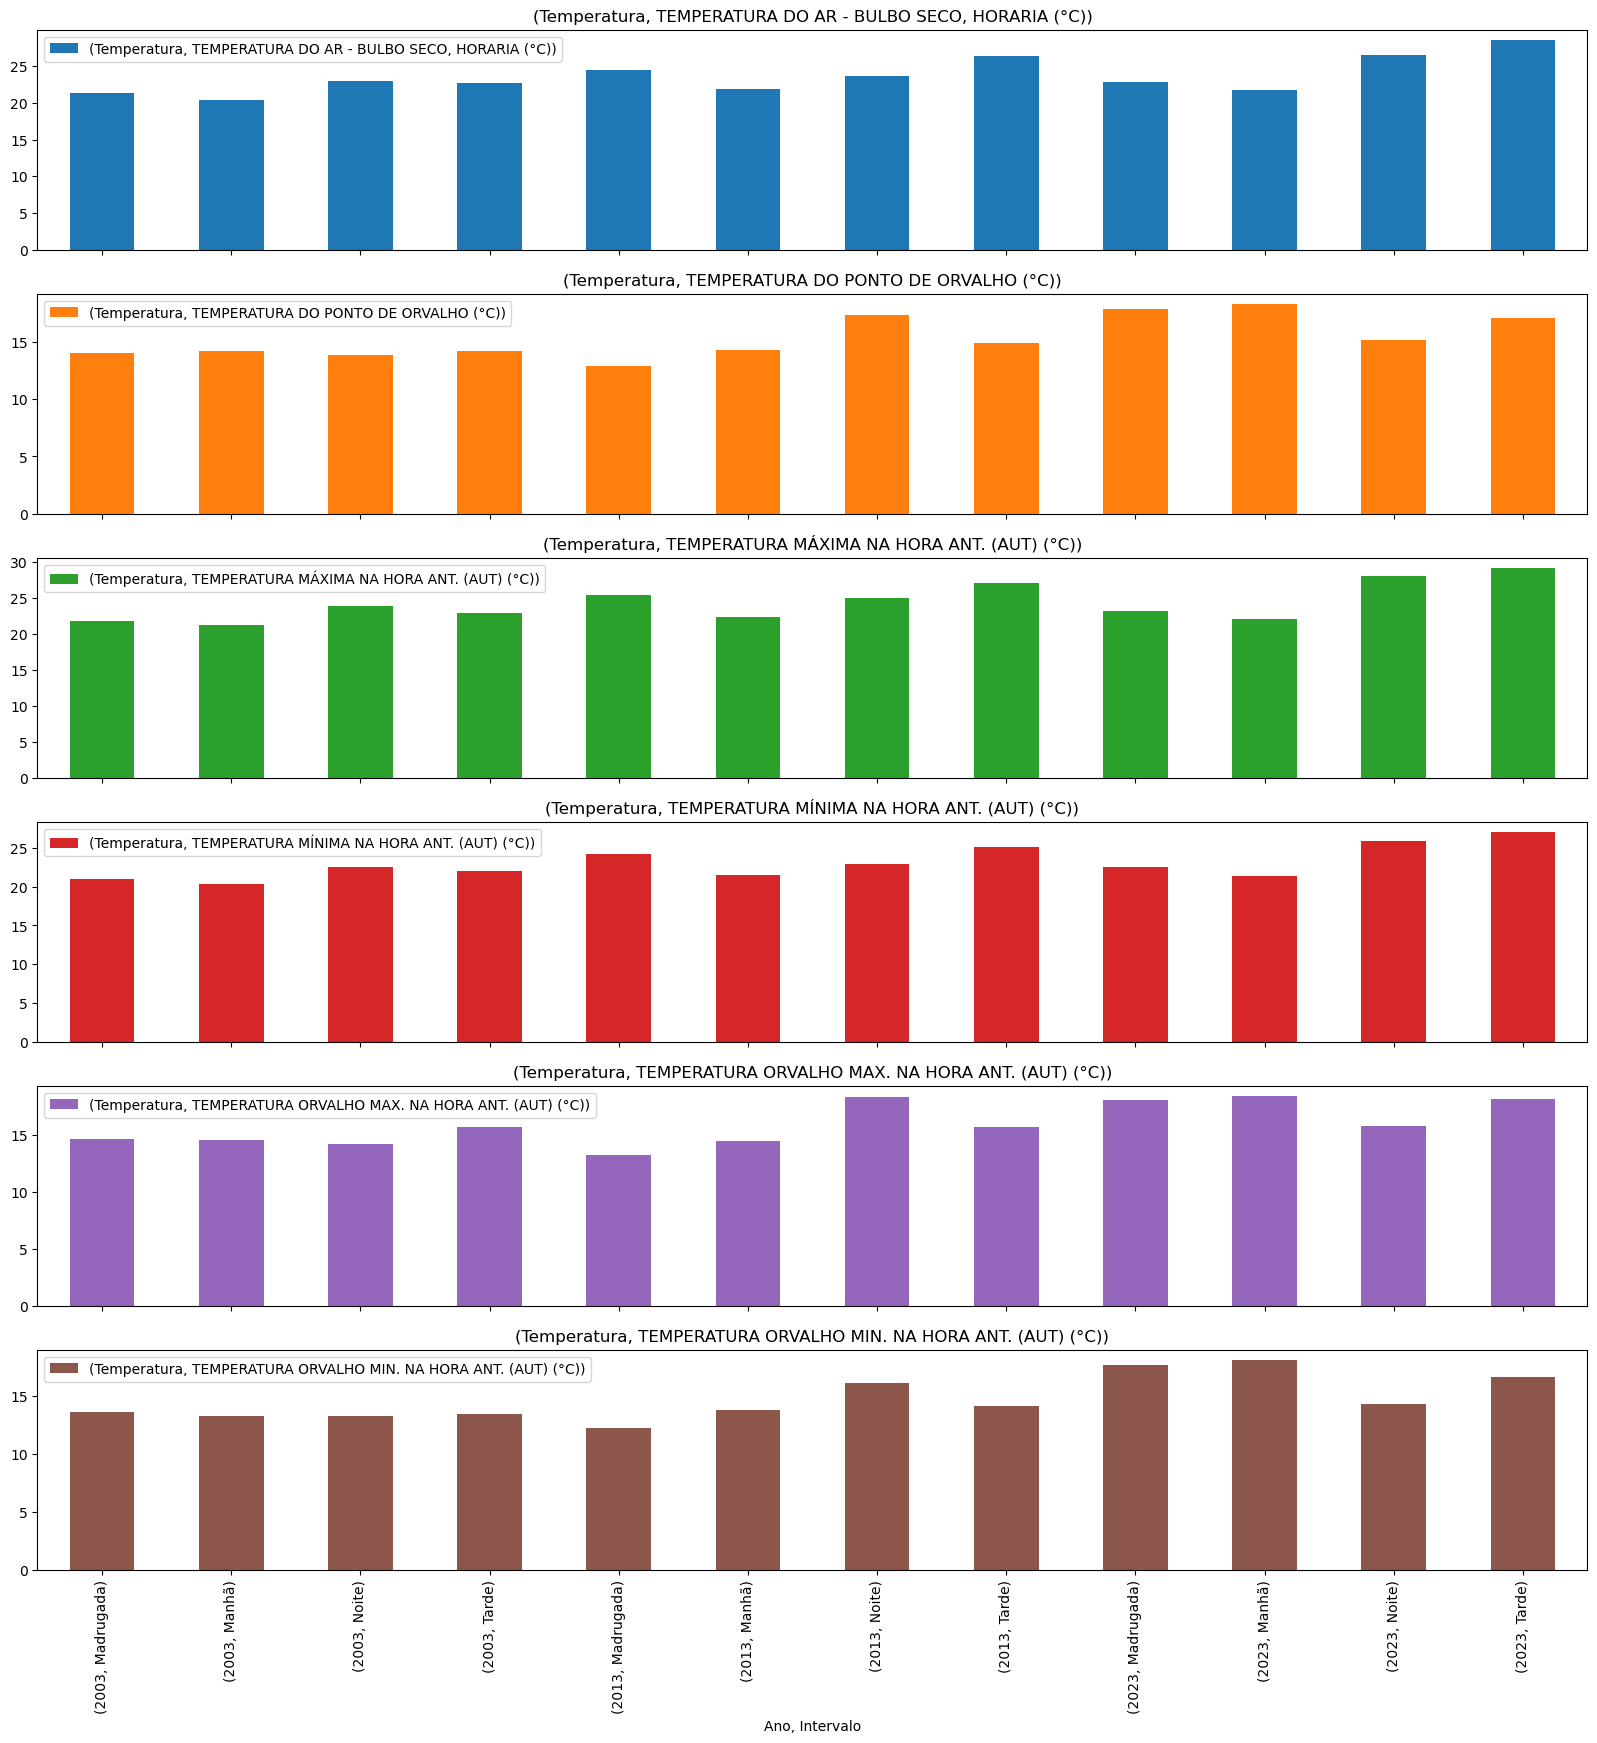

In [19]:
idf = df.loc[df.index.get_level_values("Data").month == 9]
idf = idf.loc[idf.index.get_level_values("Data").day == 28]
idf = idf.groupby([idf.index.get_level_values("Data").year, "Intervalo"])["Temperatura"].mean()
idf.plot(subplots=True, kind='bar', xlabel='Ano, Intervalo', figsize=(20,20))